In [2]:
using JLD2
using Plots
using DelimitedFiles
using CSV
using DataFrames
using StatsPlots
using Plots.PlotMeasures

In [3]:
# load inceptionTime results from UCR bakeoff redux
icpt_res = CSV.read("results/inceptionTime_accuracy.csv", DataFrame)
ecg200_inception = filter(row -> row["Resamples:"] == "ECG200", icpt_res)[1, 2:end] |> Vector
ipd_inception = filter(row -> row["Resamples:"] == "ItalyPowerDemand", icpt_res)[1, 2:end] |> Vector
# load 1NN DTW results
nndtw_res = CSV.read("results/1NN-DTW_accuracy.csv", DataFrame)
ecg200_nndtw = filter(row -> row["Resamples:"] == "ECG200", nndtw_res)[1, 2:end] |> Vector
ipd_nndtw = filter(row -> row["Resamples:"] == "ItalyPowerDemand", nndtw_res)[1, 2:end] |> Vector
# load HC2 results
hc2_res = CSV.read("results/HC2_accuracy.csv", DataFrame)
ecg200_hc2 = filter(row -> row["Resamples:"] == "ECG200", hc2_res)[1, 2:end] |> Vector
ipd_hc2 = filter(row -> row["Resamples:"] == "ItalyPowerDemand", hc2_res)[1, 2:end] |> Vector

30-element Vector{Float64}:
 0.9698736637512148
 0.9698736637512148
 0.9494655004859086
 0.967930029154519
 0.9601554907677357
 0.967930029154519
 0.967930029154519
 0.956268221574344
 0.966958211856171
 0.966958211856171
 ⋮
 0.956268221574344
 0.9611273080660836
 0.966958211856171
 0.9620991253644315
 0.9591836734693877
 0.9620991253644315
 0.9591836734693877
 0.9504373177842566
 0.9659863945578231

In [12]:
astro_hc2 = readdlm("results/hc2_folds_astroBench.txt")[:, 1]
astro_nndtw = readdlm("results/1nn_folds_astroBench_Zscore.txt")[:, 1]
astro_icpt = readdlm("results/inceptionTime_folds_astroBench.txt")[:,1]

30-element Vector{Float64}:
 0.9259259259259259
 0.9506172839506173
 0.9012345679012346
 0.9259259259259259
 0.8395061728395061
 0.9629629629629629
 0.9382716049382716
 0.9259259259259259
 0.9259259259259259
 0.9135802469135802
 ⋮
 0.9135802469135802
 0.9382716049382716
 0.8888888888888888
 0.9382716049382716
 0.9135802469135802
 0.8518518518518519
 0.9135802469135802
 0.8765432098765432
 0.9135802469135802

In [9]:
# load MPS results
astro_res_mps_f = jldopen("results/astronomy_bakeoff_results.jld2")
astro_res_mps = read(astro_res_mps_f, "res");
astro_mps = 1. .- [astro_res_mps[f]["loss"][1] for f in 1:length(astro_res_mps)] # convert misclassification rate to accuracy
astro_ds = [astro_res_mps[f]["opts"].d for f in 1:length(astro_res_mps)]
astro_chis = [astro_res_mps[f]["opts"].chi_max for f in 1:length(astro_res_mps)]
astro_etas = [astro_res_mps[f]["opts"].eta for f in 1:length(astro_res_mps)]

ecg_res_mps_f = jldopen("results/ECG200_bakeoff_results.jld2")
ecg200_res_mps = read(ecg_res_mps_f, "res");
ecg200_mps = 1. .- [ecg200_res_mps[f]["loss"][1] for f in 1:length(ecg200_res_mps)] # convert misclassification rate to accuracy
ecg_ds = [ecg200_res_mps[f]["opts"].d for f in 1:length(ecg200_res_mps)]
ecg_chis = [ecg200_res_mps[f]["opts"].chi_max for f in 1:length(ecg200_res_mps)]
ecg_etas = [ecg200_res_mps[f]["opts"].eta for f in 1:length(ecg200_res_mps)]


ipd_res_mps_f = jldopen("results/IPD_bakeoff_results.jld2")
ipd_res_mps = read(ipd_res_mps_f, "res");
ipd_mps = 1. .- [ipd_res_mps[f]["loss"][1] for f in 1:length(ipd_res_mps)] # convert misclassification rate to accuracy
ipd_ds = [ipd_res_mps[f]["opts"].d for f in 1:length(ipd_res_mps)]
ipd_chis = [ipd_res_mps[f]["opts"].chi_max for f in 1:length(ipd_res_mps)]
ipd_etas = [ipd_res_mps[f]["opts"].eta for f in 1:length(ipd_res_mps)]

30-element Vector{Float64}:
 0.1365619413848237
 0.01213175682528976
 0.003946008651427724
 0.009452165710809824
 0.0024559104708865914
 0.052897929987429475
 0.007005844333695768
 0.004699294815678531
 0.2960370228967617
 0.010708472154135102
 ⋮
 0.015570984277142444
 0.01374421313792472
 0.0037538728578435992
 0.013074991265466558
 0.0023953737930579276
 0.31905366587641204
 0.00813759187881958
 0.0017754254875140608
 0.005323887584854201

Plot hyperparameter tuning results

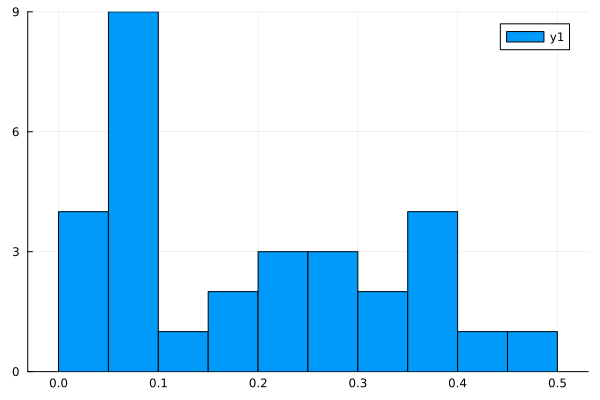

In [29]:
histogram(astro_etas, bins=10)

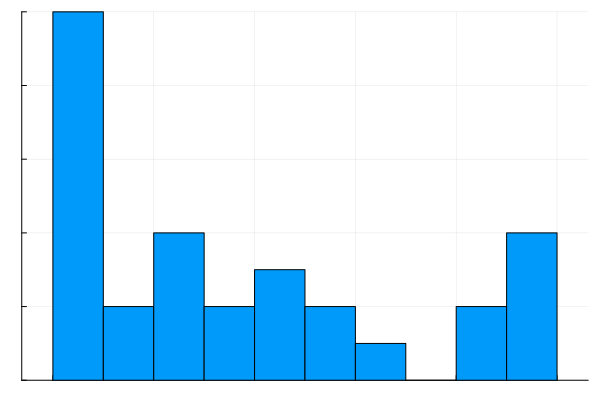

In [42]:
histogram(ecg_etas, bins=10)

In [41]:
ipd_etas

30-element Vector{Float64}:
 0.1365619413848237
 0.01213175682528976
 0.003946008651427724
 0.009452165710809824
 0.0024559104708865914
 0.052897929987429475
 0.007005844333695768
 0.004699294815678531
 0.2960370228967617
 0.010708472154135102
 ⋮
 0.015570984277142444
 0.01374421313792472
 0.0037538728578435992
 0.013074991265466558
 0.0023953737930579276
 0.31905366587641204
 0.00813759187881958
 0.0017754254875140608
 0.005323887584854201

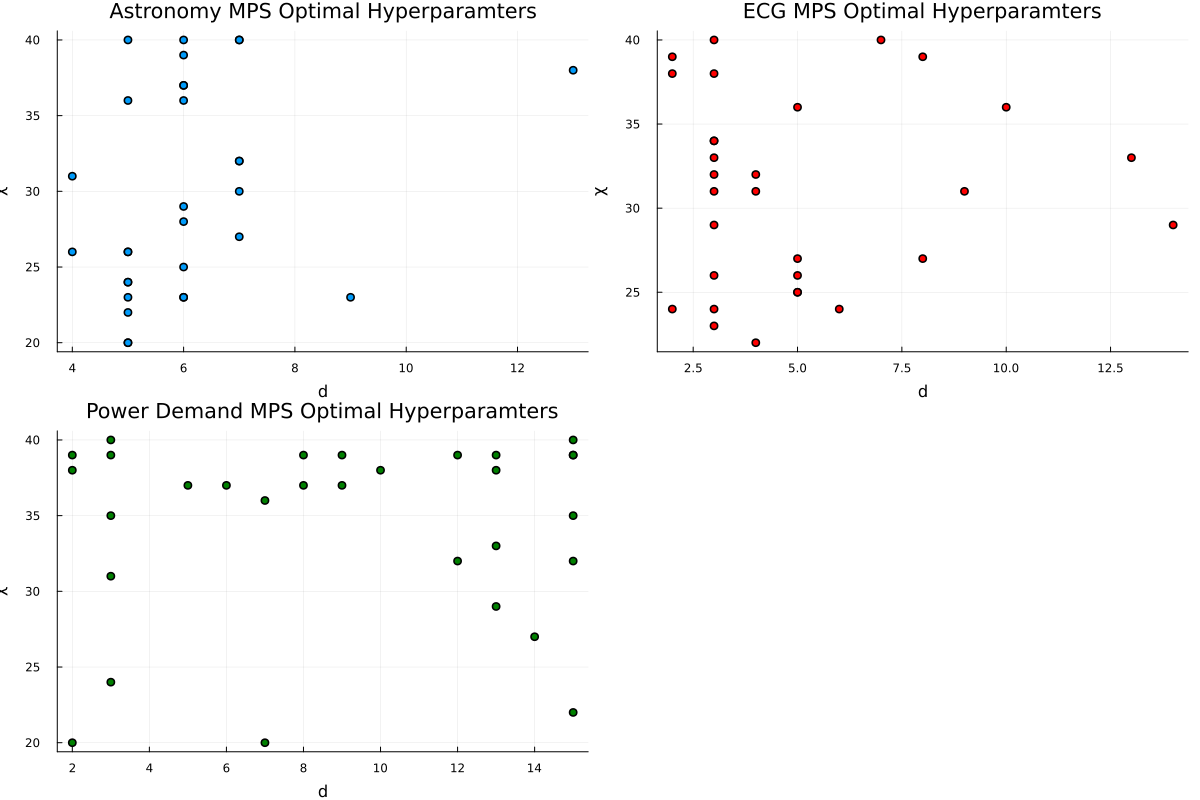

In [10]:
p1 = scatter(astro_ds, astro_chis, label="")
xlabel!("d")
ylabel!("χ")
title!("Astronomy MPS Optimal Hyperparamters")

p2 = scatter(ecg_ds, ecg_chis, label="", c=:red)
xlabel!("d")
ylabel!("χ")
title!("ECG MPS Optimal Hyperparamters")

p3 = scatter(ipd_ds, ipd_chis, label="", c=:green)
xlabel!("d")
ylabel!("χ")
title!("Power Demand MPS Optimal Hyperparamters")

plot(p1, p2, p3, size=(1200, 800))

In [13]:
TSTAR = 2.045 # student's t distirbution, 29 dof 95% CI

ipd_means = [mean(ipd_inception), mean(ipd_hc2), mean(ipd_mps), mean(ipd_nndtw)]
ipd_sems = [std(ipd_inception), std(ipd_hc2), std(ipd_mps), std(ipd_nndtw)]./sqrt(30) # standard error of the mean
ipd_95cis = TSTAR .* ipd_sems

ecg_means = [mean(ecg200_inception), mean(ecg200_hc2), mean(ecg200_mps), mean(ecg200_nndtw)]
ecg_sems = [std(ecg200_inception), std(ecg200_hc2), std(ecg200_mps), std(ecg200_nndtw)]./sqrt(30)
ecg_95cis = TSTAR .* ecg_sems

astro_means = [mean(astro_icpt), mean(astro_hc2), mean(astro_mps), mean(astro_nndtw)]
astro_sems = [std(astro_icpt), std(astro_hc2), std(astro_mps), std(astro_nndtw)]./sqrt(30)
astro_95cis = TSTAR .* astro_sems

4-element Vector{Float64}:
 0.011155852139465511
 0.007378075142859625
 0.011296169156773285
 0.017951849275335937

In [ ]:
mps_results = [ipd_means[3], ecg_means[3], astro_means[3]]
mps_95cis = [ipd_95cis[3], ecg_95cis[3], astro_95cis[3]]
icpt_results = [ipd_means[1], ecg_means[1], astro_means[1]]
icpt_95cis = [ipd_95cis[1], ecg_95cis[1], astro_95cis[1]]
nn_results = [ipd_means[4], ecg_means[4], astro_means[4]]
nn_95cis = [ipd_95cis[4], ecg_95cis[4], astro_95cis[4]]
hc2_results = [ipd_means[2], ecg_means[2], astro_means[2]]
hc2_95cis = [ipd_95cis[2], ecg_95cis[2], astro_95cis[2]]

3-element Vector{Float64}:
 0.002454416817551726
 0.010536790358246664
 0.007378075142859625

In [25]:
hc2_95cis

3-element Vector{Float64}:
 0.002454416817551726
 0.010536790358246664
 0.007378075142859625

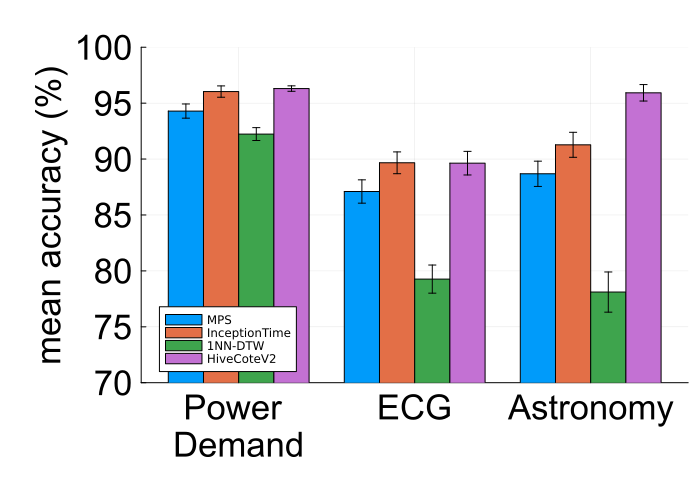

In [17]:
fstyle = font("Arial", 23)
groupedbar(
    [mps_results icpt_results nn_results hc2_results]*100, 
    yerr=[mps_95cis icpt_95cis nn_95cis hc2_95cis]*100,
    xticks=(1:3, ["Power \nDemand", "ECG", "Astronomy"]),
    label=["MPS" "InceptionTime" "1NN-DTW" "HiveCoteV2"], 
    ylabel="mean accuracy (%)",
    xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    size=(700, 500),
    left_margin=10mm,
    bottom_margin=12mm,
    top_margin=10mm,
    yticks=(70:5:100),
    ylims=(70, 100)
)
#savefig("MPSTimeClassificationRandomSearch.svg")